# SNIPS Results

In [106]:
import os
import numpy as np
import json
import pandas as pd
model_list=['mt5-300M','mt5-580M','mt5-1B','mbert','xlmr','mt5-3B','bloom7b', 'falcon7b' ,'mt5-13B']
all_data = []
for model_name in model_list:
    model_data = []
    for i in range(1,4):
        with open(f'/home/s6amalia/multi_run2/snips/{model_name}-snips/results{i}.json', 'r') as f:
            res = json.load(f)
            # print(res['all_results'][1])
    
            data = []
            for lang, accuracy in res.items():
    
                data.append({'Model': model_name, 
                         'Language': lang, 
                         'Clean Accuracy': np.round(accuracy['clean_accuracy'],2), 
                         'Noisy Accuracy':  np.round(accuracy['noisy_accuracy'],2)})
            model_data.append(data)
    
        # model_data.append(data)
        
    all_data.append(model_data)
# print(model_data)
all_results = []
# print(all_data[1])
for model in all_data:
    res1 = pd.DataFrame(model[0])
    res2 = pd.DataFrame(model[1])
    res3 = pd.DataFrame(model[2])
    res1 = res1.rename(columns={'Clean Accuracy': 'Clean Accuracy_1', 'Noisy Accuracy': 'Noisy Accuracy_1'})
    res2 = res2.rename(columns={'Clean Accuracy': 'Clean Accuracy_2', 'Noisy Accuracy': 'Noisy Accuracy_2'})
    res3 = res3.rename(columns={'Clean Accuracy': 'Clean Accuracy_3', 'Noisy Accuracy': 'Noisy Accuracy_3'})

    # print(res2)
    df_merged = pd.merge(res1, res2, on=['Model', 'Language'])
    df_merged = pd.merge(df_merged, res3, on=['Model', 'Language'])
    # print(df_merged)
    # break
    all_results.append(df_merged)

results_snips = pd.concat(all_results)
results_snips['C-N_1'] = results_snips['Clean Accuracy_1'] - results_snips['Noisy Accuracy_1']
results_snips['C-N_2'] = results_snips['Clean Accuracy_2'] - results_snips['Noisy Accuracy_2']
results_snips['C-N_3'] = results_snips['Clean Accuracy_3'] - results_snips['Noisy Accuracy_3']
results_snips['Avg Clean'] =  np.round((results_snips['Clean Accuracy_1'] + results_snips['Clean Accuracy_2'] + results_snips['Clean Accuracy_3'])/3,2)
results_snips['Avg Noisy'] =  np.round((results_snips['Noisy Accuracy_1'] + results_snips['Noisy Accuracy_2'] + results_snips['Noisy Accuracy_3'])/3,2)
results_snips['Avg C-N'] =  np.round((results_snips['C-N_1'] + results_snips['C-N_2'] + results_snips['C-N_3'])/3,2)
results_snips['StdDev'] = np.round(results_snips[['C-N_1', 'C-N_2', 'C-N_3']].std(axis=1),2)
results_snips['Relative Gap'] = np.round(100*(results_snips['Avg C-N']/results_snips['Avg Clean']),2)
results_snips

,Model,Language,Clean Accuracy_1,Noisy Accuracy_1,Clean Accuracy_2,Noisy Accuracy_2,Clean Accuracy_3,Noisy Accuracy_3,C-N_1,C-N_2,C-N_3,Avg Clean,Avg Noisy,Avg C-N,StdDev,Relative Gap
0,mt5-300M,en,97.93,97.21,98.71,97.79,98.29,97.43,0.72,0.92,0.86,98.31,97.48,0.83,0.10,0.84
1,mt5-300M,de,97.50,96.50,98.36,97.71,98.00,96.79,1.00,0.65,1.21,97.95,97.00,0.95,0.28,0.97
2,mt5-300M,es,97.64,95.79,97.93,96.64,97.64,96.50,1.85,1.29,1.14,97.74,96.31,1.43,0.37,1.46
3,mt5-300M,fr,96.93,96.43,97.86,97.07,97.14,96.21,0.50,0.79,0.93,97.31,96.57,0.74,0.22,0.76
4,mt5-300M,hi,96.21,94.21,97.00,95.29,96.79,94.86,2.00,1.71,1.93,96.67,94.79,1.88,0.15,1.94
5,mt5-300M,tr,95.71,95.21,96.86,96.57,96.29,95.50,0.50,0.29,0.79,96.29,95.76,0.53,0.25,0.55
0,mt5-580M,en,98.57,98.07,99.14,98.14,99.07,98.43,0.50,1.00,0.64,98.93,98.21,0.71,0.26,0.72
1,mt5-580M,de,98.07,97.57,98.57,98.57,98.71,98.29,0.50,0.00,0.42,98.45,98.14,0.31,0.27,0.31
2,mt5-580M,es,98.29,97.57,98.21,98.07,98.86,98.07,0.72,0.14,0.79,98.45,97.90,0.55,0.36,0.56
3,mt5-580M,fr,98.21,98.07,98.21,97.79,98.64,98.07,0.14,0.42,0.57,98.35,97.98,0.38,0.22,0.39


# All results over 3 runs

In [107]:
preferred_order = ['mbert','xlmr','mt5-300M','mt5-580M','mt5-1B','mt5-3B','bloom7b', 'falcon7b' ,'mt5-13B']

# Convert the 'Model' column to a categorical type with the preferred order
results_snips['Model'] = pd.Categorical(results_snips['Model'], categories=preferred_order, ordered=True)
# results_snips_avg['Model'] = pd.Categorical(results_snips_avg['Model'], categories=preferred_order, ordered=True)
# Sort the DataFrame by the 'Model' column
results_snips = results_snips.sort_values('Model').reset_index(drop=True)
# results_snips_avg = results_snips_avg.sort_values('Model').reset_index(drop=True)
results_snips

,Model,Language,Clean Accuracy_1,Noisy Accuracy_1,Clean Accuracy_2,Noisy Accuracy_2,Clean Accuracy_3,Noisy Accuracy_3,C-N_1,C-N_2,C-N_3,Avg Clean,Avg Noisy,Avg C-N,StdDev,Relative Gap
0,mbert,tr,98.36,97.57,98.21,97.79,98.36,98.07,0.79,0.42,0.29,98.31,97.81,0.50,0.26,0.51
1,mbert,hi,98.57,97.86,98.21,97.86,98.07,97.50,0.71,0.35,0.57,98.28,97.74,0.54,0.18,0.55
2,mbert,fr,98.64,98.14,98.50,98.00,98.29,98.07,0.50,0.50,0.22,98.48,98.07,0.41,0.16,0.42
3,mbert,es,98.71,97.93,98.64,98.07,98.29,97.79,0.78,0.57,0.50,98.55,97.93,0.62,0.15,0.63
4,mbert,de,99.07,98.29,98.93,98.29,98.93,98.14,0.78,0.64,0.79,98.98,98.24,0.74,0.08,0.75
5,mbert,en,99.07,98.29,99.07,98.29,98.93,98.00,0.78,0.78,0.93,99.02,98.19,0.83,0.09,0.84
6,xlmr,es,98.64,98.00,98.71,98.50,99.00,98.29,0.64,0.21,0.71,98.78,98.26,0.52,0.27,0.53
7,xlmr,tr,98.50,97.64,98.57,98.14,98.57,98.07,0.86,0.43,0.50,98.55,97.95,0.60,0.23,0.61
8,xlmr,hi,98.50,97.86,98.43,97.71,98.71,98.07,0.64,0.72,0.64,98.55,97.88,0.67,0.05,0.68
9,xlmr,fr,98.86,98.57,98.71,98.14,99.07,98.36,0.29,0.57,0.71,98.88,98.36,0.52,0.21,0.53


# Average Results over 3 Runs

In [108]:
results_snips_avg = results_snips.drop(columns=['Language']).groupby('Model').mean().reset_index()
results_snips_avg = results_snips_avg.round(2)
results_snips_avg

/tmp/ipykernel_543344/2090326472.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results_snips_avg = results_snips.drop(columns=['Language']).groupby('Model').mean().reset_index()


,Model,Clean Accuracy_1,Noisy Accuracy_1,Clean Accuracy_2,Noisy Accuracy_2,Clean Accuracy_3,Noisy Accuracy_3,C-N_1,C-N_2,C-N_3,Avg Clean,Avg Noisy,Avg C-N,StdDev,Relative Gap
0,mbert,98.74,98.01,98.59,98.05,98.48,97.93,0.72,0.54,0.55,98.60,98.00,0.61,0.15,0.62
1,xlmr,98.76,98.24,98.78,98.30,98.88,98.34,0.53,0.49,0.54,98.81,98.29,0.52,0.16,0.52
2,mt5-300M,96.99,95.89,97.79,96.84,97.36,96.21,1.10,0.94,1.14,97.38,96.32,1.06,0.23,1.09
3,mt5-580M,98.00,97.40,98.22,97.65,98.48,97.82,0.60,0.57,0.65,98.23,97.62,0.61,0.24,0.62
4,mt5-1B,98.46,97.94,98.46,97.94,98.46,97.94,0.53,0.53,0.53,98.46,97.94,0.52,0.00,0.53
5,mt5-3B,98.89,98.62,98.80,98.31,98.73,98.24,0.28,0.49,0.49,98.81,98.39,0.42,0.24,0.42
6,bloom7b,98.13,97.49,97.92,97.23,97.93,97.13,0.64,0.69,0.80,97.99,97.28,0.71,0.14,0.72
7,falcon7b,97.71,97.04,97.70,96.69,97.64,96.29,0.68,1.01,1.36,97.69,96.67,1.02,0.47,1.04
8,mt5-13B,99.01,98.67,98.80,98.52,98.92,98.55,0.34,0.27,0.37,98.91,98.58,0.33,0.11,0.33


# Best Results of 3 runs

In [131]:
all_df_b = []
best_per=results_snips_avg[['Clean Accuracy_1', 'Clean Accuracy_2', 'Clean Accuracy_3']].idxmax(axis=1).str.replace('Clean Accuracy', '')
for i in range(len(results_snips_avg)):
    
    df_b = results_snips[results_snips['Model']==results_snips_avg['Model'][i]][['Model','Language','Clean Accuracy'+best_per[i],'Noisy Accuracy'+best_per[i]]]
    df_b = df_b.rename(columns=lambda x: x.split('_')[0] if '_' in x else x)
    all_df_b.append(df_b)

best_res_snips = pd.concat(all_df_b)
best_res_snips['C-N'] = best_res_snips['Clean Accuracy'] - best_res_snips['Noisy Accuracy']
best_res_snips['Relative Gap'] = np.round(100*(best_res_snips['C-N']/best_res_snips['Clean Accuracy']),2)
best_res_snips
best_res_snips['C-N'] = best_res_snips['C-N'].round(2)
best_res_snips[best_res_snips['Language']=='hi'][['Model','C-N']]
best_res_snips
# lang = ['en' , 'de' , 'es' , 'fr' ,'hi','tr']
# best_res_snips.to_csv('snips.csv')
# for m in results_snips_avg['Model']:
# # best_res_wikiann['Relative Gap'] = np.round(100*(best_res_wikiann['C-N']/best_res_wikiann['Clean F1']),2)
#     tt = best_res_snips[best_res_snips['Model']==m]
#     # print(tt)
#     # tt.fillna(0)
#     print(m)
#     print(' & '.join(str(tt[tt['Language']==i]['Clean Accuracy'].values[0]) for i in lang )) 
#     print(' & '.join(str(tt[tt['Language']==i]['Noisy Accuracy'].values[0]) for i in lang)) 
#     print(' & '.join(str(tt[tt['Language']==i]['C-N'].values[0]) for i in lang))
# results_snips_avg['Model']

,Model,Language,Clean Accuracy,Noisy Accuracy,C-N,Relative Gap
0,mbert,tr,98.36,97.57,0.79,0.80
1,mbert,hi,98.57,97.86,0.71,0.72
2,mbert,fr,98.64,98.14,0.50,0.51
3,mbert,es,98.71,97.93,0.78,0.79
4,mbert,de,99.07,98.29,0.78,0.79
5,mbert,en,99.07,98.29,0.78,0.79
6,xlmr,es,99.00,98.29,0.71,0.72
7,xlmr,tr,98.57,98.07,0.50,0.51
8,xlmr,hi,98.71,98.07,0.64,0.65
9,xlmr,fr,99.07,98.36,0.71,0.72


In [133]:
best_res_snips.groupby('Language')['Clean Accuracy'].mean()

Language
de    98.695000
en    98.961111
es    98.530000
fr    98.532222
hi    98.212500
tr    98.247143
Name: Clean Accuracy, dtype: float64

In [124]:
best_res_snips[best_res_snips['Language']=='tr']

,Model,Language,Clean Accuracy,Noisy Accuracy,C-N,Relative Gap
0,mbert,tr,98.36,97.57,0.79,0.80
7,xlmr,tr,98.57,98.07,0.50,0.51
17,mt5-300M,tr,96.86,96.57,0.29,0.30
19,mt5-580M,tr,97.86,97.50,0.36,0.37
25,mt5-1B,tr,98.29,98.07,0.22,0.22
30,mt5-3B,tr,98.86,98.71,0.15,0.15
41,bloom7b,tr,97.29,96.36,0.93,0.96
42,falcon7b,tr,97.07,96.21,0.86,0.89
53,mt5-13B,tr,98.93,98.86,0.07,0.07


# Best Results Average over Languages

In [132]:
best_res_snips = best_res_snips[~((best_res_snips['Language'] == 'de') & (best_res_snips['Model'] == 'bloom7b'))]
best_res_snips = best_res_snips[~((best_res_snips['Language'] == 'tr') & (best_res_snips['Model'] == 'bloom7b'))]
best_res_snips = best_res_snips[~((best_res_snips['Language'] == 'hi') & (best_res_snips['Model'] == 'falcon7b'))]
best_res_snips = best_res_snips[~((best_res_snips['Language'] == 'tr') & (best_res_snips['Model'] == 'falcon7b'))]
best_res_snips.to_csv('snips.csv')


b_avg_snips = best_res_snips.drop(columns=['Language']).groupby('Model').mean().reset_index()
b_avg_snips = b_avg_snips.round(2)
b_avg_snips

/tmp/ipykernel_543344/469211224.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  b_avg_snips = best_res_snips.drop(columns=['Language']).groupby('Model').mean().reset_index()


,Model,Clean Accuracy,Noisy Accuracy,C-N,Relative Gap
0,mbert,98.74,98.01,0.72,0.73
1,xlmr,98.88,98.34,0.54,0.54
2,mt5-300M,97.79,96.84,0.94,0.96
3,mt5-580M,98.48,97.82,0.65,0.67
4,mt5-1B,98.46,97.94,0.52,0.53
5,mt5-3B,98.89,98.62,0.27,0.28
6,bloom7b,98.41,97.82,0.59,0.60
7,falcon7b,98.02,97.39,0.62,0.64
8,mt5-13B,99.01,98.67,0.34,0.34


## Number of tokens per language used for each model's pre training process

In [46]:
data = {
    'mt5-300M': [2733, 433, 347, 318, 71, 24],
    'mt5-580M': [2733, 433, 347, 318, 71, 24],
    'mt5-1B': [2733, 433, 347, 318, 71, 24],
    'mt5-3B': [2733, 433, 347, 318, 71, 24],
    'mt5-13B': [2733, 433, 347, 318, 71, 24],
    'xlmr': [0.30, 0.05, 0.07, 0.06, 0.02, 0.02],
    'falcon7b': [750, 17, 18, 16, np.nan, np.nan],
    'mbert': [4.59, 1.20, 1.56, 1.68, 0.16, 0.06],
    'bloom7b': [112, 40, np.nan, 46, np.nan, 5.6]
}

index = ['en', 'es', 'de', 'fr', 'tr', 'hi']

df_lang_size = pd.DataFrame(data, index=index)
df_lang_size

,mt5-300M,mt5-580M,mt5-1B,mt5-3B,mt5-13B,xlmr,falcon7b,mbert,bloom7b
en,2733,2733,2733,2733,2733,0.30,750.0,4.59,112.0
es,433,433,433,433,433,0.05,17.0,1.20,40.0
de,347,347,347,347,347,0.07,18.0,1.56,NaN
fr,318,318,318,318,318,0.06,16.0,1.68,46.0
tr,71,71,71,71,71,0.02,NaN,0.16,NaN
hi,24,24,24,24,24,0.02,NaN,0.06,5.6


## Correlation bet. [size of languages and C-N] , [size of languages, Clean Accuracy]

[[ 0.05492247 -0.32222785 -0.03329873 -0.06413292 -0.11022378  0.20826378
   0.3309927   0.87809139  0.38769083]]
[[0.76550341 0.45273019 0.72088337 0.65010045 0.55015354 0.87330046
  0.52442114 0.9948427  0.59068069]]


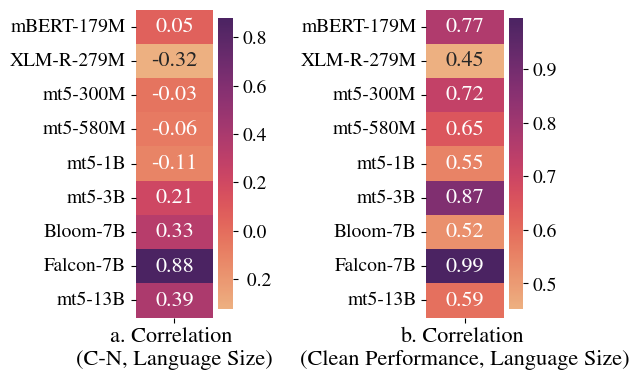

In [125]:
lang_cn=[]
lang_cl = []
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Provide the font's path manually

font_path = '/fonts/Times-Roman Regular.ttf'
# Create a font property object
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)

font_size = 16
# Set the font as the default font for all text elements in plots
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = font_size

import seaborn as sns
import matplotlib.pyplot as plt
for i in range(len(b_avg_snips['Model'])):
    model_name =b_avg_snips['Model'][i]
    mt5=best_res_snips[best_res_snips['Model']==model_name][['Language','C-N','Clean Accuracy']]
    mt5['lang size'] = df_lang_size[model_name][mt5['Language']].values
    # res=mt5[['lang size','Avg C-N','Avg Clean']].corr()
    lang_cn.append(mt5[['lang size','C-N','Clean Accuracy']].corr()['lang size']['C-N'])
    # print(lang_cn)
    lang_cl.append(mt5[['lang size','C-N','Clean Accuracy']].corr()['lang size']['Clean Accuracy'])

fig, axs = plt.subplots(1, 2, figsize=(5, 4))
labels = ['mBERT-179M', 'XLM-R-279M', 'mt5-300M', 'mt5-580M', 'mt5-1B', 'mt5-3B', 'Bloom-7B', 'Falcon-7B', 'mt5-13B']
# Create the heatmaps
# sns.heatmap(data1, ax=axs[0])
# sns.heatmap(data2, ax=axs[1])
df = pd.DataFrame([lang_cn], columns=labels, index=['a. Correlation \n(C-N, Language Size)'])
# plt.figure(figsize=(1.5, 5))

heatmap1 =sns.heatmap(df.T,  cmap="flare",fmt=".2f",annot=True, ax=axs[0])
axs[0].set_yticklabels(axs[0].get_yticklabels(), size=font_size-2)  # Set ytick label size
axs[0].set_xticklabels(axs[0].get_xticklabels(), size=font_size)
axs[0].set_ylabel('')
cbar1 = heatmap1.collections[0].colorbar

cbar1.ax.tick_params(labelsize=font_size-2)
print(df.values)
# plt.show()
# plt.figure(figsize=(1.5, 5))
# plt.figure(figsize=(1.5, 5))
df = pd.DataFrame([lang_cl], columns=labels, index=['b. Correlation \n(Clean Performance, Language Size)'])
heatmap2 =sns.heatmap(df.T,  cmap="flare" ,fmt=".2f",annot=True, ax=axs[1])
axs[1].set_yticklabels(axs[1].get_yticklabels(), size=font_size-2)  # Set ytick label size
axs[1].set_xticklabels(axs[1].get_xticklabels(), size=font_size)
axs[1].set_ylabel('')
cbar1 = heatmap2.collections[0].colorbar
cbar1.ax.tick_params(labelsize=font_size-2)
plt.subplots_adjust(wspace=2)
plt.savefig('/snips_corr_lang.pdf',bbox_inches='tight')
# df.plot.bar()
print(df.values)
# df

<Axes: >

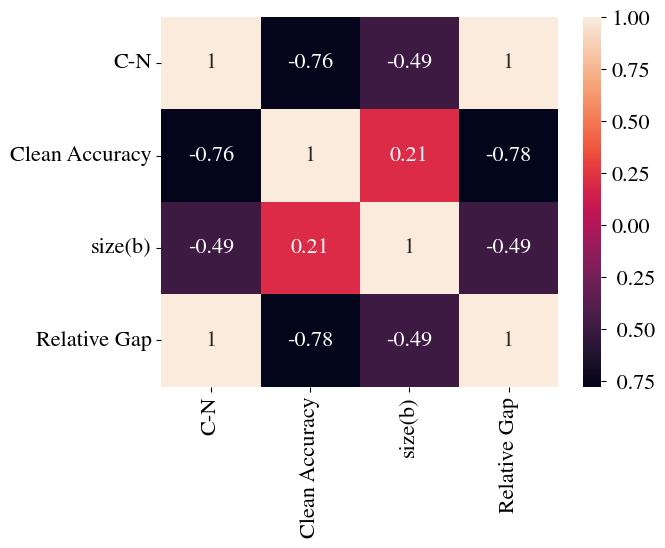

In [126]:
b_avg_snips['size(b)'] = [0.179,0.279,0.3,0.58,1,3,7,7,13]
sns.heatmap(b_avg_snips[['C-N','Clean Accuracy','size(b)', 'Relative Gap']].corr(), annot=True)


In [59]:
df_filtered = b_avg_snips[b_avg_snips['Model'].str.contains('mt')]
df_filtered
df_filtered[['C-N','Clean Accuracy','size(b)']].corr()

,C-N,Clean Accuracy,size(b)
C-N,1.000000,-0.946419,-0.532278
Clean Accuracy,-0.946419,1.000000,0.414983
size(b),-0.532278,0.414983,1.000000


## Average C-N and Relative Gap per model Snips

In [61]:
mean_df = best_res_snips.groupby('Language')['C-N'].mean()
mean_df

Language
de    0.581250
en    0.603333
es    0.554444
fr    0.577778
hi    0.761250
Name: C-N, dtype: float64

<Axes: xlabel='Model'>

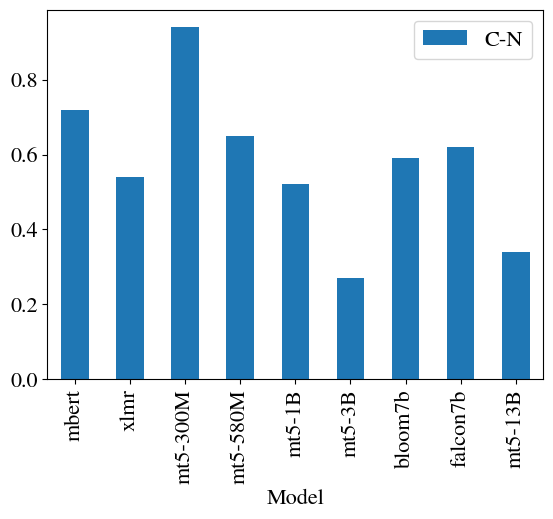

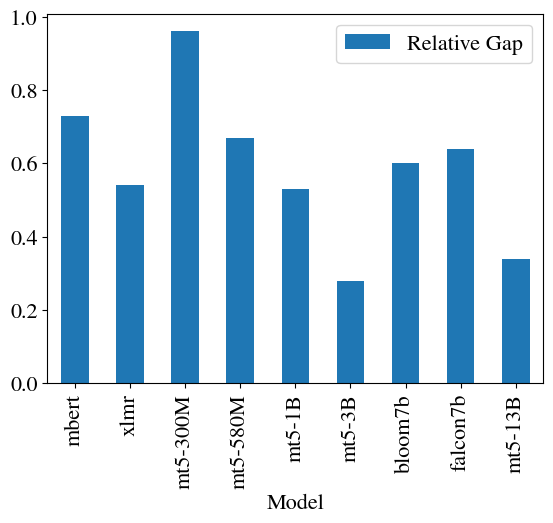

In [127]:
b_avg_snips.plot.bar(x = 'Model', y='C-N')
b_avg_snips.plot.bar(x = 'Model', y='Relative Gap')

## C-N and Relative Gap per Language for all models

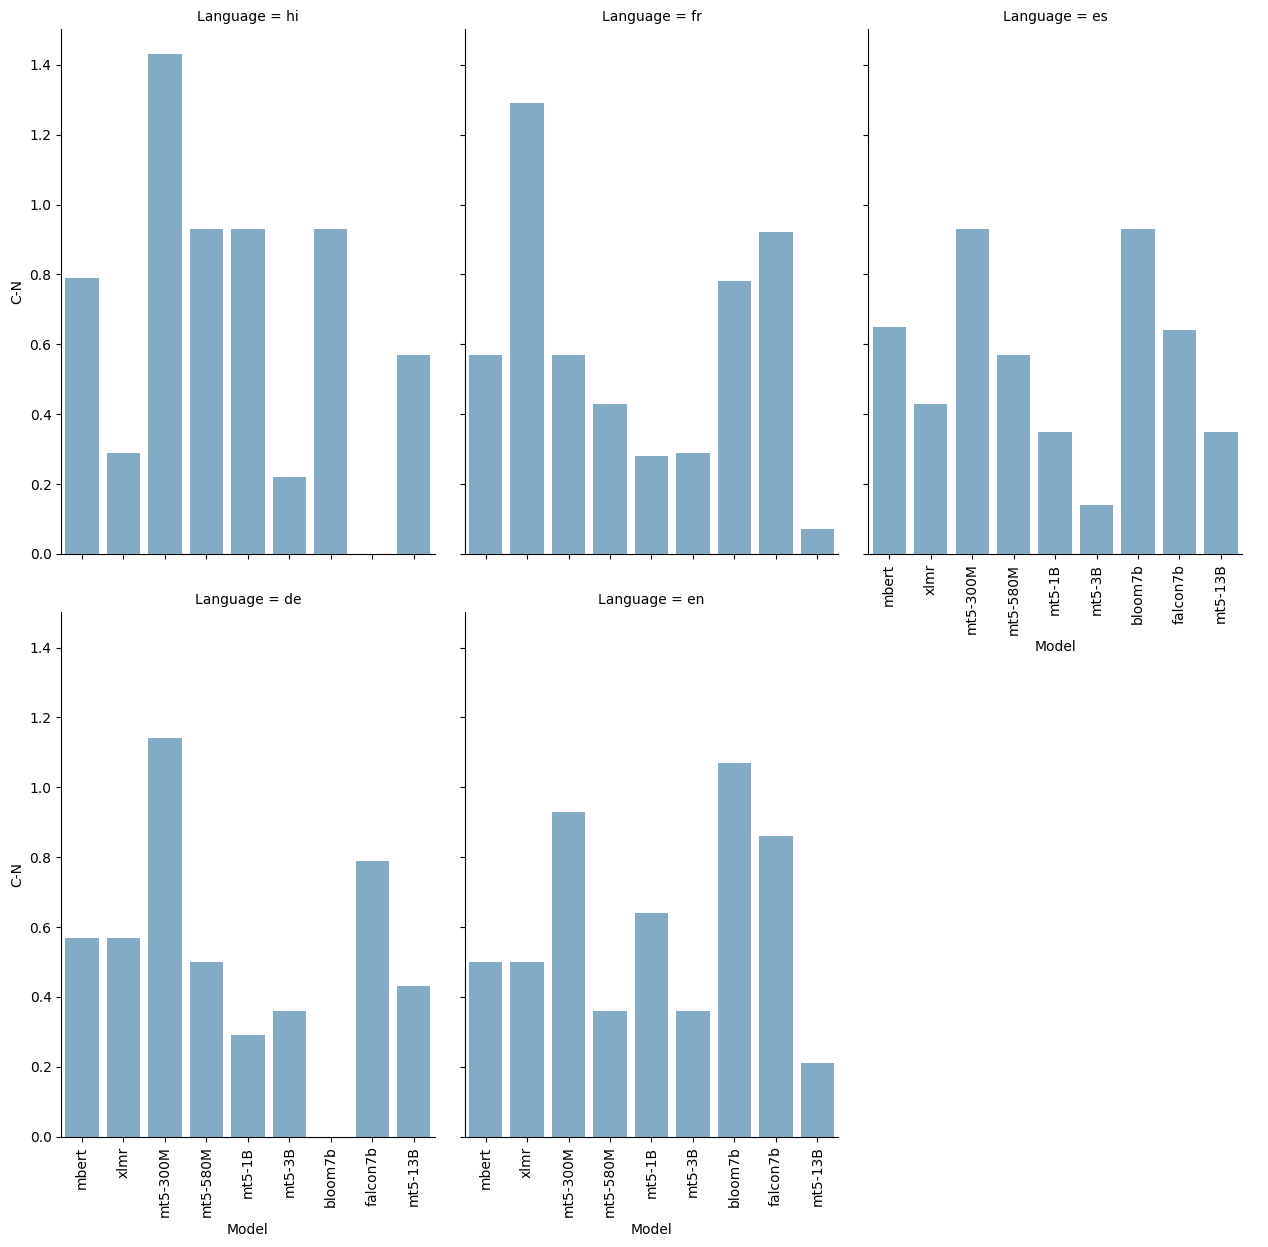

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
g = sns.catplot(
    data=best_res_snips, kind="bar",
    x="Model", y="C-N", col="Language",
      alpha=.6, height=6,
    aspect=0.7, col_wrap =3
)

g.set_axis_labels("Model", "C-N")
# g.set_xticklabels(rotation=45)
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(90)
# plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

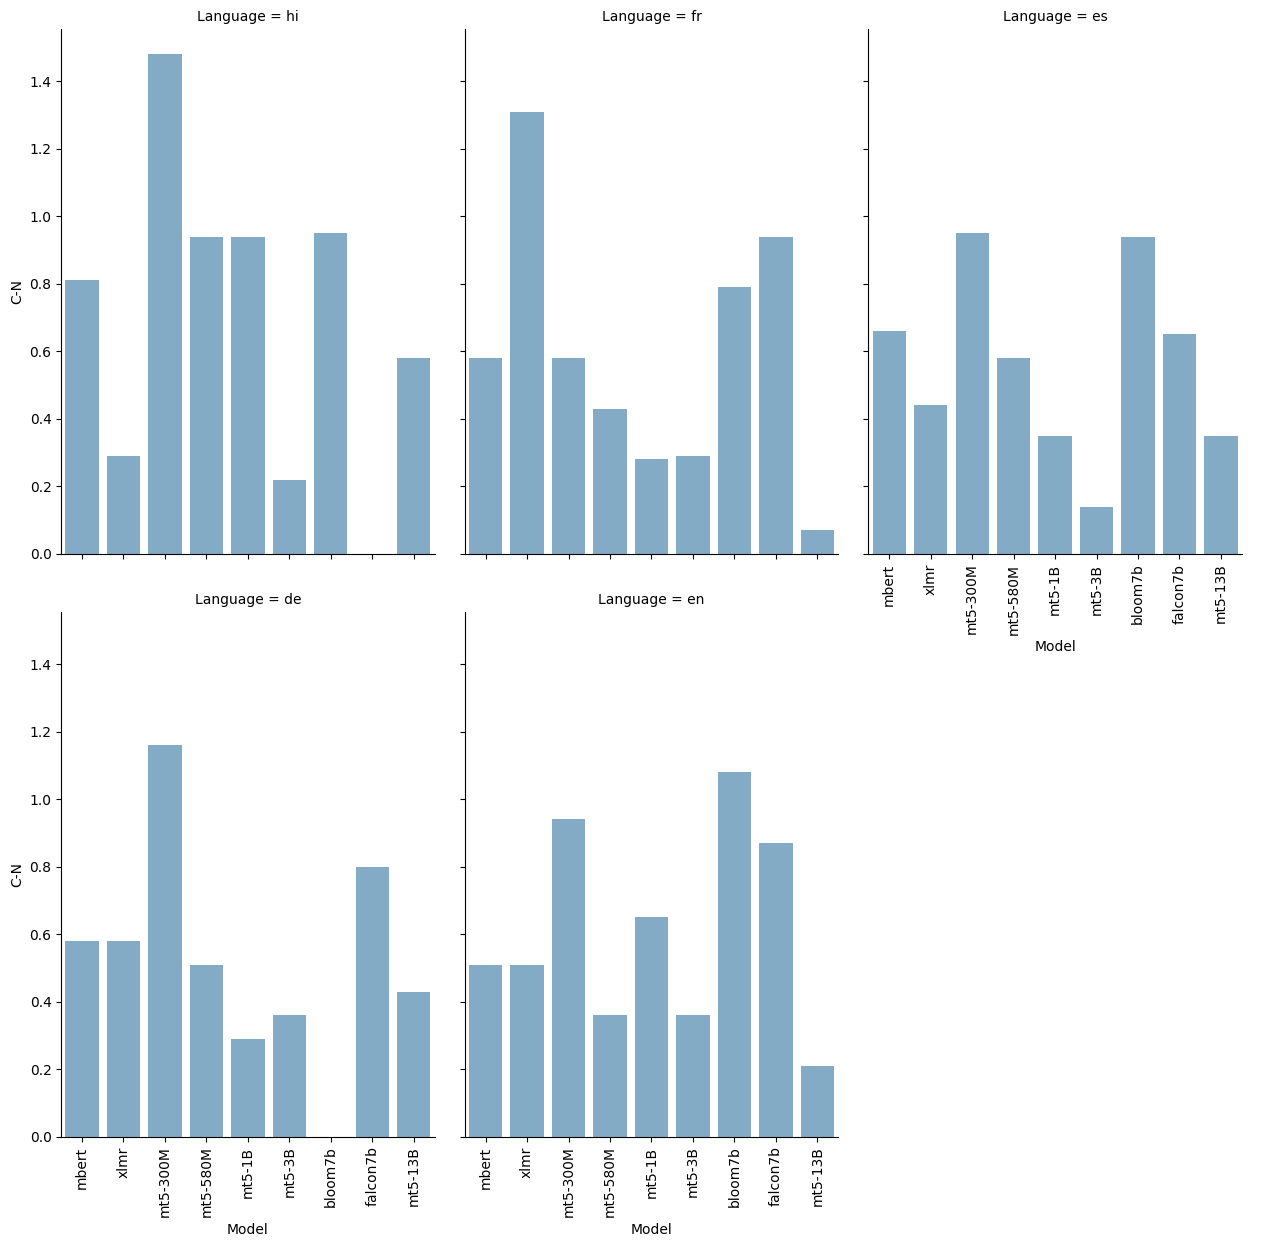

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
g = sns.catplot(
    data=best_res_snips, kind="bar",
    x="Model", y="Relative Gap", col="Language",
      alpha=.6, height=6,
    aspect=0.7, col_wrap =3
)

g.set_axis_labels("Model", "C-N")
# g.set_xticklabels(rotation=45)
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(90)
# plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

In [135]:
from datasets import load_dataset, DatasetDict, load_from_disk, Dataset
for lang in ['en', 'de', 'es', 'fr', 'hi', 'tr']:
    print(lang)
    # temp_res = {}
    if lang == 'en':
        ds_orig = load_dataset('benayas/snips')
    else:
        ds_orig = load_from_disk("/snips_dataset/snips_" + lang + ".hf")
    print(ds_orig['test'][10])


en
{'text': 'add jeff burrows album to my Country Hits playlist', 'category': 'AddToPlaylist'}
de
{'text': 'Jeff Burrows Album zu meiner Country Hits Wiedergabeliste hinzufügen', 'category': 'AddToPlaylist'}
es
{'text': 'añadir el álbum de Jeff Burrows a mi lista de canciones de Country Hits', 'category': 'AddToPlaylist'}
fr
{'text': "Ajoutez l'album de Jeff Burrows à ma liste de lecture de Country Hits", 'category': 'AddToPlaylist'}
hi
{'text': 'मेरे देश हिट्स प्लेलिस्ट में जेफ Burrows एल्बम जोड़ें', 'category': 'AddToPlaylist'}
tr
{'text': 'Country Hits çalma listeme Jeff Burrows albümünü ekle', 'category': 'AddToPlaylist'}
